In [1]:
# importing packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split 
from sklearn import metrics

In [3]:
# open data
df = pd.read_csv('/Users/SnehPandya/Desktop/DeepLearningAGN/data/tau_fulldata_matched2.csv',index_col = 0)
df.head()

,ID,RA,DEC,Mass_ground_truth,ERR,z,tau,tau_lim_lo,tau_lim_hi,M_tau,mu,M_i
0,301,2.169302,1.238649,7.523331,1.523093,1.0730,1.99550,1.53265,3.72459,7.652679,20.7869,-23.901
1,144,1.091028,0.962126,8.817950,0.167267,0.7867,2.27673,2.08917,4.02532,8.154875,20.7824,-23.399
2,58,0.331289,0.177230,8.921718,0.204242,1.6199,1.87484,1.62701,3.03110,7.437214,20.5453,-24.735
3,190,1.364696,-0.098956,9.022211,0.267495,0.6125,2.47534,2.32222,4.21751,8.509536,19.8859,-23.121
4,36,0.221552,-0.292485,9.249395,0.057662,2.7563,1.70714,1.28728,3.62220,7.137750,20.6848,-26.451


In [4]:
df = df.drop(columns = ['ID','z', 'ERR', 'RA','DEC','tau_lim_lo','tau_lim_hi','M_tau','tau','M_i'])
df.head()

,Mass_ground_truth,mu
0,7.523331,20.7869
1,8.817950,20.7824
2,8.921718,20.5453
3,9.022211,19.8859
4,9.249395,20.6848


In [5]:
array = df.to_numpy()
array

array([[  7.52333061,  20.7869    ],
       [  8.81795034,  20.7824    ],
       [  8.92171817,  20.5453    ],
       ..., 
       [  8.45017379,  22.1334    ],
       [  8.02155865,  21.0673    ],
       [  8.98848251,  20.3018    ]])

In [6]:
mu_array = array[:,1].reshape(-1,1)
mass_array = array[:,0]
print(mu_array)
print(mass_array)

[[ 20.7869]
 [ 20.7824]
 [ 20.5453]
 ..., 
 [ 22.1334]
 [ 21.0673]
 [ 20.3018]]
[ 7.52333061  8.81795034  8.92171817 ...,  8.45017379  8.02155865
  8.98848251]


In [8]:
#split train and test set (X -> tau, y -> mass)
X_train, X_test, y_train, y_test = train_test_split(mu_array, mass_array, test_size=0.2, random_state=0)

In [9]:
#define regression and train it
regressor = LinearRegression()
regressor.fit(X_train,y_train)

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/base.py:503: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  linalg.lstsq(X, y)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [10]:
# retrieve line of best fit attributes
print(regressor.intercept_) # y-intercept (b)
print(regressor.coef_) # slope (m)
print(regressor.score(X_test,y_test)) #(r^2 score)

9.62858534366
[-0.03803064]
0.00338124563765


In [11]:
# apply regression on test set
y_pred_test = regressor.predict(X_test)
y_pred_train = regressor.predict(X_train)

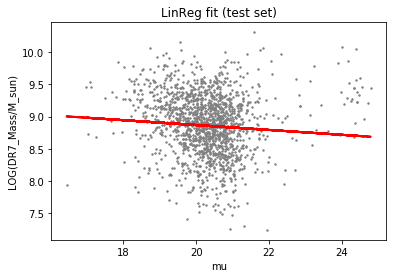

In [12]:
# plotting
plt.scatter(X_test, y_test,  color='gray',s=2)
plt.plot(X_test, y_pred_test, color='red', linewidth=2)
plt.xlabel('mu')
plt.ylabel('LOG(DR7_Mass/M_sun)')
plt.title('LinReg fit (test set)')
plt.show()

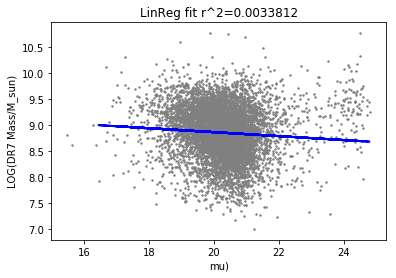

In [13]:
plt.scatter(X_test, y_test,  color='gray',s=2)
plt.scatter(X_train,y_train,color='gray',s=2)
plt.plot(X_test, y_pred_test, color='blue', linewidth=2)
plt.xlabel('mu)')
plt.ylabel('LOG(DR7 Mass/M_sun)')
plt.title('LinReg fit r^2=' + str(regressor.score(X_test,y_test))[0:9])
plt.show()

In [14]:
# statistics
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_test)))

Root Mean Squared Error: 0.479004770772
